In [1]:
!pip install spacy pandas

In [2]:
import spacy

spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
import pandas as pd

# Assuming dataset
df = pd.read_csv('/content/UpdatedResumeDataSet.csv')

# Assuming resume content is in the 'Resume' column
resumes = df['Resume'].tolist()

In [4]:
def analyze_resume(resume):
    doc = nlp(resume)

    # Example analysis
    skills = [token.text for token in doc if token.text.lower() in ['python', 'machine learning', 'sql', 'javascript']]
    experience = doc.ents  # Extract entities such as companies, technologies, etc.

    return skills, experience

# Analyze all resumes in the dataset
for resume in resumes:
    skills, experience = analyze_resume(resume)
    print("Skills:", skills)
    print("Experience:", experience)
    print("\n---\n")

Streaming output truncated to the last 5000 lines.
Skills: []
Experience: (January 2005, S.S.C, Baramati, Maharashtra M.E.S. Highschool, B.E. Civil Engineering Pune,, Maharashtra Singhad Institute Of Technology And Science, Skill Details 
Site, Exprience - 60 monthsCompany Details)

---

Skills: []
Experience: (2.Pro, 3.Catia â¢ 4.word, Larsen & Tubro, Inplant Training, Ashoka Buildcon-Training, January 2017 Masters, Maharashtra Universal University Nashik
Civil Engineer 

, Skill Details, Autocad- Exprience, 1 months, Exprience, 6 months, Exprience, 48 months, 1 months, Exprience, Dubai, Villa's, Hotels, 1.Exterior, Interior, 2.Construction, villa's, Villa's, Hotels, Showrooms, Villa's, 1, 2, 3, 3, 4, 5, Forecast, 6, day, 2015-2016, Villas, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 3.Provided, 6.ensure, 7.liaise)

---

Skills: []
Experience: (KSA, Basic Computer â¢ MS Office â¢ Autocad 2006Education Details, January 2005, Diploma  Bengaluru, Karnataka Oxford, Banglore
Civil Engineer 

, P

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn import metrics

# Assuming have labeled data (0 for not selected, 1 for selected)
labels = df['Category'].apply(lambda x: 1 if x == 'Data Science' else 0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(resumes, labels, test_size=0.2, random_state=42)

# Build a simple text classification model
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 1.0
Confusion Matrix:
[[188   0]
 [  0   5]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00         5

    accuracy                           1.00       193
   macro avg       1.00      1.00      1.00       193
weighted avg       1.00      1.00      1.00       193



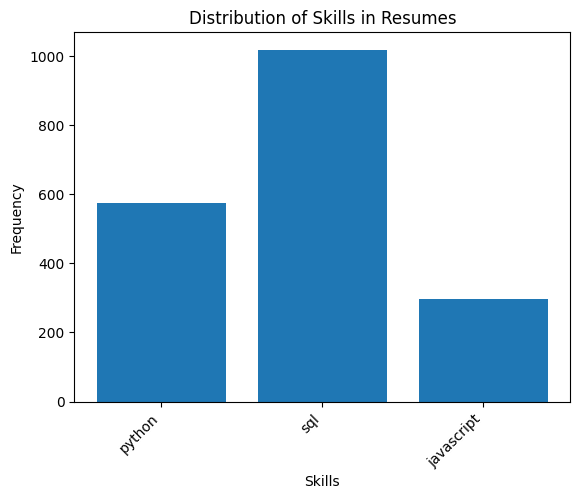

In [7]:
import matplotlib.pyplot as plt
from collections import Counter

# Function to extract skills from a resume
def extract_skills(resume):
    doc = nlp(resume)
    skills = [token.text.lower() for token in doc if token.text.lower() in ['python', 'machine learning', 'sql', 'javascript']]
    return skills

# Extract skills from all resumes
all_skills = [extract_skills(resume) for resume in resumes]

# Flatten the list of skills
flat_skills = [skill for sublist in all_skills for skill in sublist]

# Count the occurrences of each skill
skill_counts = Counter(flat_skills)

# Plot a bar chart
plt.bar(skill_counts.keys(), skill_counts.values())
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.title('Distribution of Skills in Resumes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [8]:
# Assume a candidate's resume is stored in a variable 'new_resume'
new_resume = "Skills: Python, SQL, Machine Learning, TensorFlow"

# Make a prediction for the new resume
new_resume_pred = model.predict([new_resume])
print(f"Prediction for the new resume: {'Data Science Interview' if new_resume_pred[0] == 1 else 'Not Selected for Interview'}")

Prediction for the new resume: Data Science Interview


In [9]:
# Assume a candidate's resume is stored in a variable 'new_resume'
new_resume = "Skills: Excel, JavaScript, Java, TensorFlow"

# Make a prediction for the new resume
new_resume_pred = model.predict([new_resume])
print(f"Prediction for the new resume: {'Data Science Interview' if new_resume_pred[0] == 1 else 'Not Selected for Interview'}")

Prediction for the new resume: Not Selected for Interview
